# Inspect SDSS DR16 Quasar Samples

In [1]:
import sys
sys.path.append("..")

from astropy.io import fits
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lib.get_config import get_config
cfg = get_config('../config/config.yaml')

Load config file >> ../config/config.yaml


In [2]:
df = pd.read_csv(Path(cfg['data_dir'], 'catalogue', 'sdssdr16q_prop.csv'), sep=',', header=0)

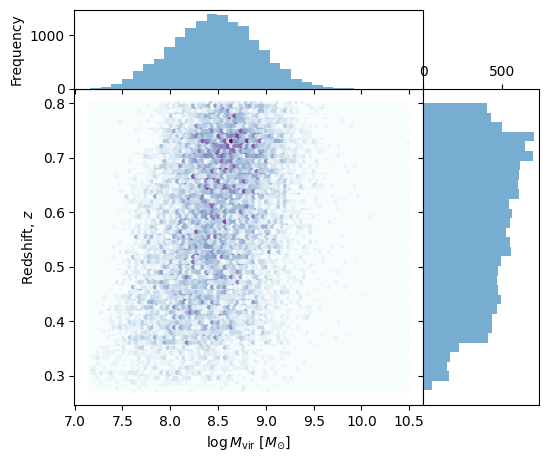

In [88]:
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(2, 2, width_ratios=(3,1), height_ratios=(1,4), top=0.9, right=0.9, hspace=0., wspace=0.)

ax = fig.add_subplot(gs[1, 0])
ax.hexbin(df['LOGMBH'], df['Z_FIT'], gridsize=100, cmap='BuPu', alpha=0.9)

ax_xhist = fig.add_subplot(gs[0, 0], sharex=ax)
ax_xhist.hist(df['LOGMBH'], bins=30, alpha=0.6)
ax_yhist = fig.add_subplot(gs[1, 1], sharey=ax)
ax_yhist.hist(df['Z_FIT'], bins=30, orientation='horizontal', alpha=0.6)

ax_xhist.tick_params(axis="x", labelbottom=False)
ax_yhist.tick_params(top=True, labeltop=True, labelbottom=False, bottom=False, labelleft=False)

ax.set_xlabel(r'$\log M_{\mathrm{vir}}\ [M_{\odot}]$')
ax.set_ylabel(r'Redshift, $z$')
ax_xhist.set_ylabel('Frequency')
fig.savefig('plots/datamvirvsz.pdf', bbox_inches='tight')
plt.show()

# Inspect SDSS DR16 Quasar Samples from Selection Criteria

In [1]:
import sys
sys.path.append("..")

from astropy.io import fits
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lib.get_config import get_config
cfg = get_config('../config/config.yaml')

Load config file >> ../config/config.yaml


## Load catalogue of filtered samples

In [2]:
df = pd.read_csv(Path(cfg['data_dir'], 'catalogue', 'sdssdr16q_prop.csv'), sep=',', header=0)

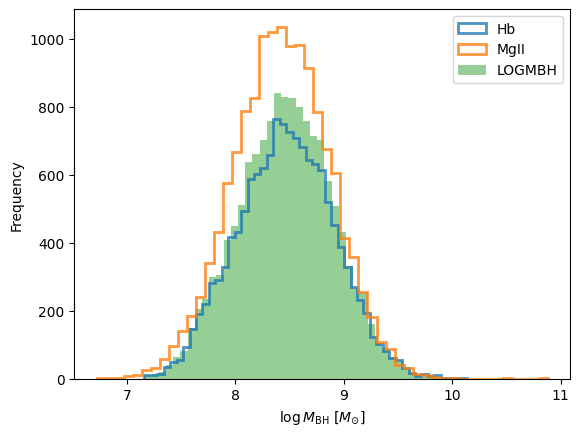

In [8]:
fig, ax = plt.subplots()
df['LOGMBH_HB'].plot.hist(bins=50, histtype='step', lw=2, alpha=0.8, label='Hb')
df['LOGMBH_MGII'].plot.hist(bins=50, histtype='step', lw=2, alpha=0.8, label='MgII')
df['LOGMBH'].plot.hist(bins=50, alpha=0.5)
ax.legend()
ax.set_xlabel(r'$\log M_{\mathrm{BH}}\ [M_{\odot}]$')
plt.show()

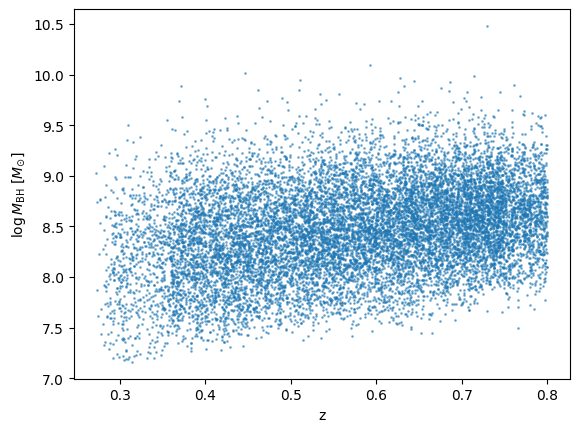

In [7]:
fig, ax = plt.subplots()
ax.scatter(df['Z_FIT'], df['LOGMBH'], s=1, alpha=0.5)
ax.set_xlabel('z')
ax.set_ylabel(r'$\log M_{\mathrm{BH}}\ [M_{\odot}]$')
plt.show()

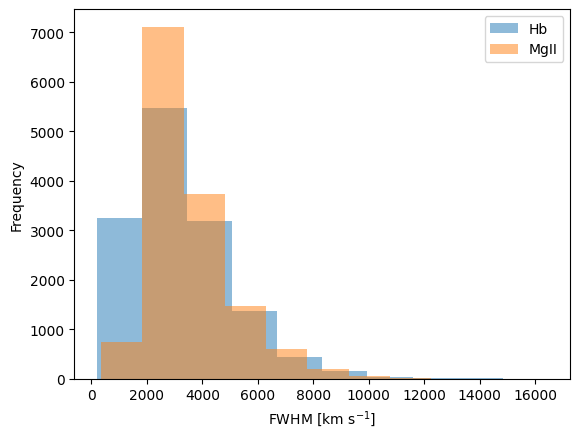

In [9]:
fig, ax = plt.subplots()
df['HBETA_FWHM'].plot.hist(alpha=0.5, label='Hb')
df['MGII_FWHM'].plot.hist(alpha=0.5, label='MgII')
ax.legend()
ax.set_xlabel(r'FWHM [km s$^{-1}$]')
plt.show()

## Selected Samples

In [10]:
from lib.dataset_sdssquasarspec import SDSSQuasarSpecDataset

/Users/sukyee/opt/miniconda3/envs/mltorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# List spectra file
list_files = np.asarray([str(f) for f in Path(cfg['data_dir'], 'spectra').rglob('*.fits.gz')])

# Get latest datasplitidx file
datasplitidx_file = list(Path(cfg['data_dir'], 'logs').rglob('**/datasplitidx.pkl'))[-1]
data_idx = pd.read_pickle(datasplitidx_file)

# Get properties
df_sample = SDSSQuasarSpecDataset.get_labelbyfilename(df, path_fits=list_files)[1]
df_train = df_sample.iloc[data_idx['train']]
df_test = df_sample.iloc[data_idx['test']]

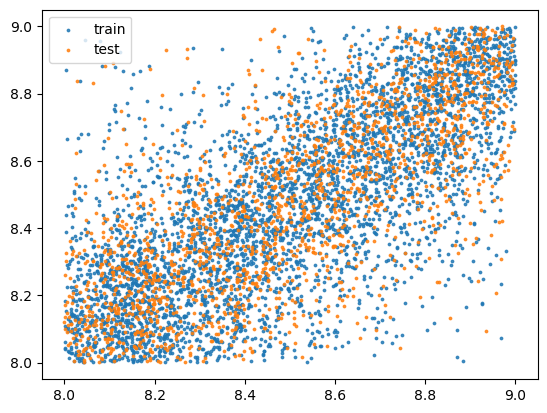

In [12]:
plt.figure()
plt.scatter(df_train['LOGMBH_HB'], df_train['LOGMBH_MGII'], s=3, alpha=0.8, label='train')
plt.scatter(df_test['LOGMBH_HB'], df_test['LOGMBH_MGII'], s=3, alpha=0.8, label='test')
plt.legend()
plt.show()

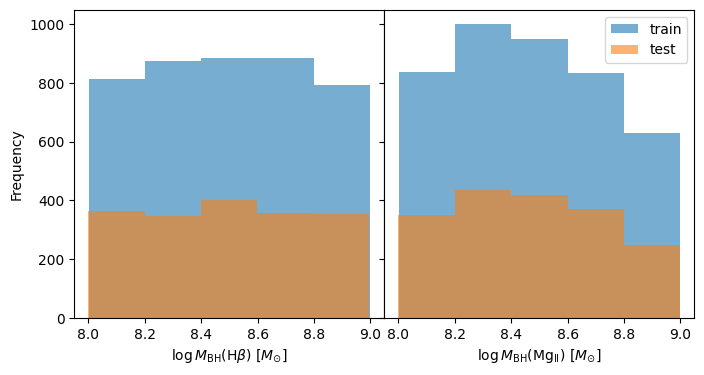

In [18]:
bins = 5
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True, gridspec_kw={'wspace': 0})
ax[0].hist(df_train['LOGMBH_HB'], bins=bins, alpha=0.6, label='train')
ax[0].hist(df_test['LOGMBH_HB'], bins=bins, alpha=0.6, label='test')
ax[0].set_xlabel(r'$\log M_{\mathrm{BH}}(\mathrm{H}\beta)\ [M_{\odot}]$')
ax[1].hist(df_train['LOGMBH_MGII'], bins=bins, alpha=0.6, label='train')
ax[1].hist(df_test['LOGMBH_MGII'], bins=bins, alpha=0.6, label='test')
ax[1].set_xlabel(r'$\log M_{\mathrm{BH}}(\mathrm{Mg}_{\mathrm{II}})\ [M_{\odot}]$')
ax[0].set_ylabel('Frequency')
ax[1].legend()
plt.show()
# fig.savefig('plots/hist_databh.pdf', bbox_inches='tight')

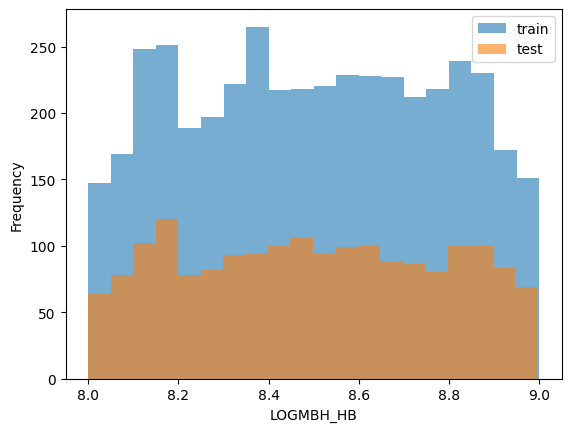

In [14]:
label_key = 'LOGMBH_HB'
fig, ax = plt.subplots()
ax.hist(df_train[label_key], bins=20, alpha=0.6, label='train')
ax.hist(df_test[label_key], bins=20, alpha=0.6, label='test')
ax.set_xlabel(label_key)
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

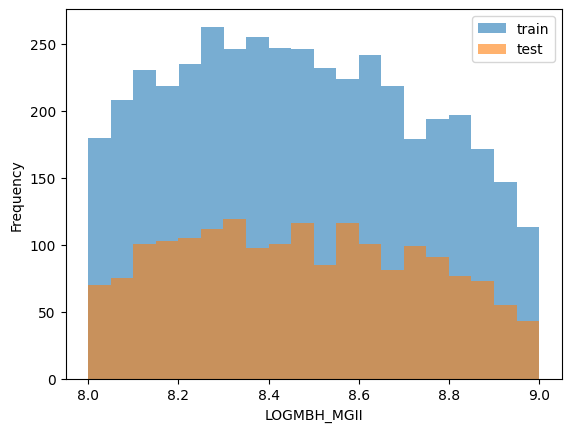

In [15]:
label_key = 'LOGMBH_MGII'
fig, ax = plt.subplots()
ax.hist(df_train[label_key], bins=20, alpha=0.6, label='train')
ax.hist(df_test[label_key], bins=20, alpha=0.6, label='test')
ax.set_xlabel(label_key)
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

## Visualize Quasar Spectrum

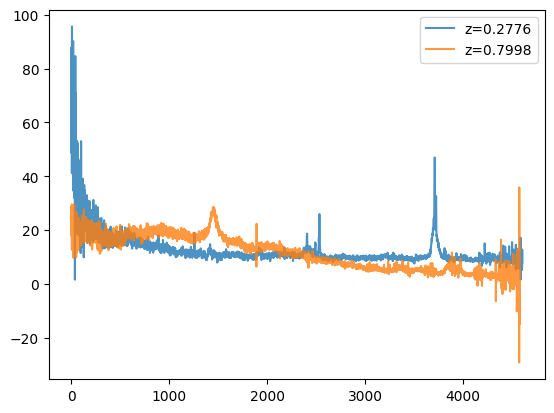

In [11]:
# Plot spectra for lowest and highest redshift
df_minz = df_train[df_train['Z_FIT']==df_train['Z_FIT'].min()]
df_maxz = df_train[df_train['Z_FIT']==df_train['Z_FIT'].max()]
data_minz = fits.getdata(Path(cfg['data_dir'], 'spectra', f"op-{df_minz['OBJID'].values[0]}.fits.gz"), ext=3)
data_maxz = fits.getdata(Path(cfg['data_dir'], 'spectra', f"op-{df_maxz['OBJID'].values[0]}.fits.gz"), ext=3)

plt.figure()
plt.plot(data_minz['flux_prereduced'], label=f"z={df_minz['Z_FIT'].values[0]:.4f}", alpha=0.8)
plt.plot(data_maxz['flux_prereduced'], label=f"z={df_maxz['Z_FIT'].values[0]:.4f}", alpha=0.8)
plt.legend()
plt.show()

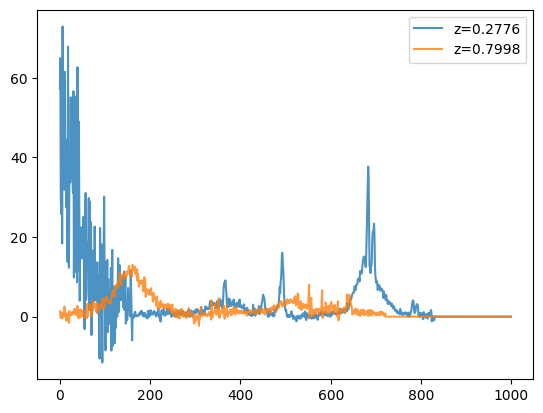

In [12]:
# Plot flux line for lowest and highest redshift
npixel = 1000
plt.figure()
plt.plot(data_minz['flux_line'][:npixel], label=f"z={df_minz['Z_FIT'].values[0]:.4f}", alpha=0.8)
plt.plot(data_maxz['flux_line'][:npixel], label=f"z={df_maxz['Z_FIT'].values[0]:.4f}", alpha=0.8)
plt.legend()
plt.show()

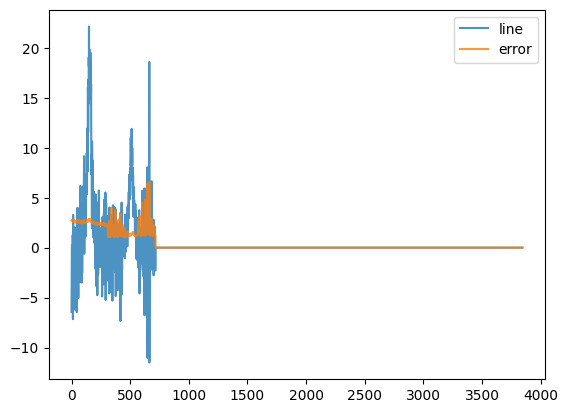

In [17]:
# Plot line flux
sample_n = 10
objid = SDSSQuasarSpecDataset.get_labelbyfilename(df, path_fits=list_files[sample_n])[0][0]
data = fits.getdata(Path(cfg['data_dir'], 'spectra', f"op-{objid}.fits.gz"), ext=3)
plt.figure()
plt.plot(data['flux_line'], alpha=0.8, label='line')
plt.plot(data['err_line'], alpha=0.8, label='error')
plt.legend()
plt.show()